Mixture Gaussian Example of Lindley 1972 in https://tminka.github.io/papers/minka-pathologies.pdf

In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png, titlefontsize=10)
using Optim

In [2]:
mixnormal(μ, σ) = MixtureModel([Normal(), Normal(μ, σ)], [0.5, 0.5])

mixnormal (generic function with 1 method)

In [3]:
Random.seed!(45105963)
n = 10
X = round.(rand(mixnormal(4, 1.5), n); digits=1)

10-element Vector{Float64}:
  5.3
  3.8
  1.1
  7.4
  0.8
  2.8
  0.3
  1.9
 -0.8
 -0.1

In [4]:
f(μ, t) = loglikelihood(mixnormal(μ, exp(t)), X)

f (generic function with 1 method)

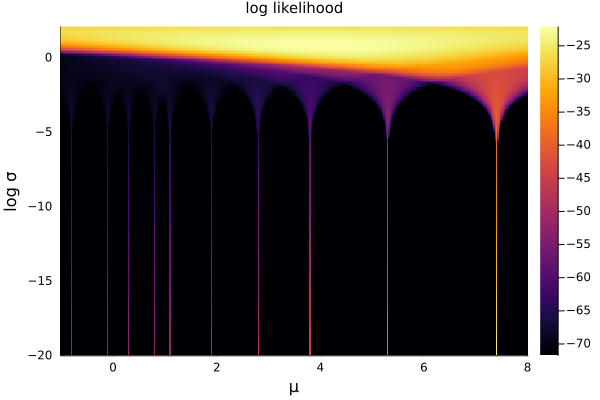

In [5]:
μ = range(-1, 8, 361)
t = range(-20, 2, 200)
z = f.(μ', t)
heatmap(μ, t, z)
title!("log likelihood")
plot!(; xguide="μ", yguide="log σ")

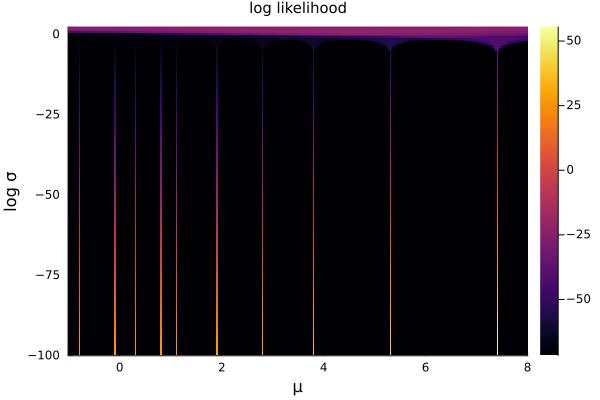

In [6]:
μ = range(-1, 8, 361)
t = range(-100, 2, 200)
z = f.(μ', t)
heatmap(μ, t, z)
title!("log likelihood")
plot!(; xguide="μ", yguide="log σ")

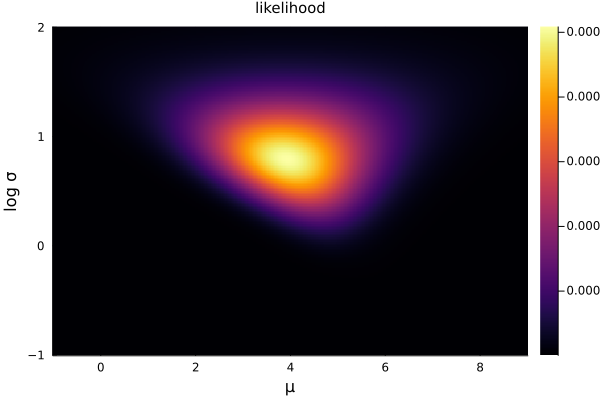

In [7]:
μ = range(-1, 9, 361)
t = range(-1, 2, 200)
z = exp.(f.(μ', t))
heatmap(μ, t, z)
title!("likelihood")
plot!(; xguide="μ", yguide="log σ")

In [8]:
@show o = optimize(x -> -f(x...), [4.0, 1.0])
o.minimizer[1], exp(o.minimizer[2])

o = optimize((x->begin
                #= In[8]:1 =#
                -(f(x...))
            end), [4.0, 1.0]) =  * Status: success

 * Candidate solution
    Final objective value:     2.209183e+01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    32
    f(x) calls:    62



(3.9283458461727987, 2.208167456054178)

In [9]:
for k in eachindex(X)
    o = optimize(x -> -f(x...), [X[k], -50])
    @show k, X[k], o.minimizer[1], exp(o.minimizer[2])
end

(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (1, 5.3, 5.3, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (2, 3.8, 3.8, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (3, 1.1, 1.1, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (4, 7.4, 7.4, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (5, 0.8, 0.8, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (6, 2.8, 2.8, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (7, 0.3, 0.3, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (8, 1.9, 1.9, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (9, -0.8, -0.8, 2.746446979337455e-33)
(k, X[k], o.minimizer[1], exp(o.minimizer[2])) = (10, -0.1, -0.1, 2.746446979337455e-33)


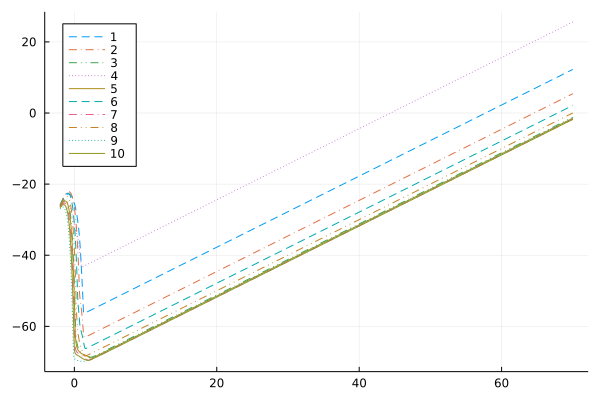

In [10]:
P = plot(; legend=:topleft)
for k in eachindex(X)
    plot!(t -> f(X[k], -t), -2, 70; label="$k", ls=:auto)
end
P